# **심장건강과 환자 변수 데이터분석을 통한 심장마비 위험 예측**
- 데이터셋 변경하였습니다!

- 데이터 출처 : heart-attack-prediction-dataset
https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset

## *<1주차 과정>* 

### **라이브러리 불러오기**

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## **TASK 1. 데이터 출처 / 데이터 불러오기**

- **데이터 선정 이유 / 분석목적** : 현대의학의 발전에도 불구하고 꾸준히 유지되는 심장마비 발생건수는 심장마비가 아직 해결하기 어려운 질환이라는 것을 의미한다. 환자별 건강세부정보, 생활습관, 나라, 임금 등의 변수와 심장건강을 비교분석하여 유의미한 결론을 도출해 심장마비 예방안을 모색한다.

In [ ]:
df = pd.read_csv('/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv')

## **TASK 2. 기초통계량 확인**

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
int_var = df[['Age','Cholesterol','Heart Rate','Diabetes','Family History','Smoking','Obesity','Alcohol Consumption','Previous Heart Problems','Medication Use','Stress Level','Previous Heart Problems','Medication Use','Stress Level','Income','Triglycerides','Physical Activity Days Per Week','Sleep Hours Per Day','Heart Attack Risk' ]]
obj_var = df[['Patient ID','Sex','Blood Pressure','Diet','Country','Continent','Hemisphere' ]]
float_var = df[['Exercise Hours Per Week','Sedentary Hours Per Day','Sedentary Hours Per Day','BMI']]

In [ ]:
int_var.describe()

In [ ]:
obj_var.describe()

In [ ]:
df.describe()

## 데이터 개요

- 데이터 총 샘플 수: 8,763개
- 총 특성(컬럼) 수: 26개

- 수치형 데이터 : 19개 (**연속형데이터**: 나이, 콜레스테롤, 심박수, 주당 운동시간, 하루 좌식시간, 체질량지수, 중성지방, 소득 / **이산형데이터** : 당뇨, 가족력, 흡연여부, 비마여부, 음주여부, 이전심장질환여부, 약물복용여부, 스트레스 수준, 주간운동횟수, 수면시간, 심장마비 위험)

- 범주형 데이터: 7개 (**명목형데이터**: 환자ID, 성별, 국가, 대륙, 반구, 혈압변주, 식단유형)

## 기초통계 분석

**(1) 나이(Age)**
- 평균(mean): 53.7세
- 표준편차(std): 21.2
- 최소(min): 18세
- 최대(max): 90세
→ 데이터가 18~90세로 다양하게 분포, 평균적으로 중장년층이 많음.

**(2) 콜레스테롤(Cholesterol)**
- 평균: 259.88
- 최소/최대: 120 ~ 400
→ 콜레스테롤 수치가 꽤 높은 편으로, 심혈관 질환 위험이 있을 가능성이 큼.

**(3) 심박수(Heart Rate)**
- 평균: 75 bpm
- 최소/최대: 40 ~ 110 bpm
→ 전반적으로 정상 범위이지만, 40 이하/110 이상 값은 위험 가능성이 있음.

**(4) 당뇨(Diabetes)**
- 평균: 0.65 (이진 변수)
→ 전체 데이터 중 약 65%가 당뇨 환자. 심장질환과 관련성이 높을 가능성이 큼.

**(5) 가족력(Family History)**
- 평균: 0.49
→ 약 50%의 사람들이 가족력이 있음. 유전적 영향이 강할 가능성.

**(6) 흡연(Smoking)**
- 평균: 0.89
→ 대부분(약 90%)이 흡연 경험이 있음. 심장질환 위험 요소 중 하나.

**(7) 비만(Obesity)**
- 평균: 0.50
→ 절반 정도가 비만. BMI와 연관성이 높을 것으로 예상됨.

**(8) 운동 시간(Exercise Hours Per Week)**
- 평균: 10시간
- 최소/최대: 0.002 ~ 20시간
→ 대부분 적절한 운동을 하지만, 일부 데이터는 운동 부족 상태일 가능성이 있음.

**(9) BMI (체질량지수)**
- 평균: 28.89
- 최소/최대: 18 ~ 39
→ 평균적으로 과체중(25 이상), 일부는 비만(30 이상) 범주.

**(10) 트리글리세라이드(Triglycerides, 중성지방)**
- 평균: 417
- 최소/최대: 30 ~ 800
→ 혈중 중성지방이 높은 경우가 많음. 콜레스테롤과 연관.

**(11) 좌식 시간(Sedentary Hours Per Day)**
- 평균: 5.99시간
→ 하루 평균 6시간 이상 앉아 있는 생활패턴. 심혈관 건강에 부정적 영향 가능성.

**(12) 심장마비 위험(Heart Attack Risk)**
-평균: 0.35 (이진 변수)
→ 약 35%의 환자가 심장마비 위험군으로 분류됨. 높은 수치.

### 앗! 성별의 분포는?

In [ ]:
import pandas as pd

sex_counts = df['Sex'].value_counts()

# 성별 분포 출력
print(sex_counts)

- 남자가 거의 3배 많다는 점을 고려해야 한다.

In [ ]:
#성별에 따라 심장마비 위험 비율이 어떻게 다를까?
sex_heart_attack = df.groupby('Sex')['Heart Attack Risk'].mean()

# 출력
print(sex_heart_attack)

- 성별에 따른 심장마비 위험 비율이 거의 비슷한데, 남성의 위험 비율이 약간 더 높다.
- 두 그룹 간의 차이가 **0.3%**로 매우 미미하기 때문에, 성별만으로 심장마비 위험에 큰 차이가 있다고 보기는 어렵다.

### 일부 열의 데이터 타입이 숫자가 아닌 object(문자형)으로 저장되어 있어 범주형 데이터 변환을 해야 한다.

In [ ]:

# 데이터 불러오기
df = pd.read_csv('/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv')
# 범주형 컬럼을 숫자로 변환 (예: 'Sex', 'ChestPainType' 등)
categorical_columns = df.select_dtypes(include=['object']).columns

# Label Encoding 방식 적용
df_encoded = df.copy()
for col in categorical_columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

### 결측값 확인

In [ ]:
# 결측값 확인
print(df.isnull().sum())

# 결측값이 있다면 삭제 (또는 다른 값으로 대체 가능)
df = df.dropna()


### 편의를 위해 컬럼명을 대문자 -> 소문자로 변경

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
print(df.columns)

## **TASK 3. 분석목적/인사이트 설명**

## **INSIGHT**

- 콜레스테롤 & 심장마비 위험: 양의 상관관계 예상 (콜레스테롤이 높을수록 심장마비 위험 증가 가능성)
- 흡연 & 심장마비 위험: 강한 상관관계 예상 (흡연자가 심장마비 위험이 높을 가능성)
- 비만 & 트리글리세라이드: 강한 상관관계 예상 (비만일수록 중성지방 수치 증가 가능성)
- 운동 & BMI: 음의 상관관계 예상 (운동 시간이 많을수록 BMI 낮아질 가능성)
- 심장마비 위험군이 35%로 높은 편이므로, 고위험군 특징을 더 분석해 볼 필요가 있다.
- 운동량과 건강 지표 간의 관계, 생활 습관(흡연, 좌식 시간 등)과의 관계를 추가 분석 예정

## *<2주차 과정>*

## **TASK 1: EDA - 변수 간 관계 분석 및 유의미한 시각화 "5개 이상"**

- 데이터 시각화를 위해 matplotlib, seaborn, pandas 라이브러리를 사용

In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

df = pd.read_csv('/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv')

### 랜덤 값 생성

In [3]:
data = {
    'age': np.random.randint(30, 80, 100),  # 30~79세 랜덤 연령 생성
    'cholesterol': np.random.randint(150, 300, 100),  # 콜레스테롤 수치 150~299 범위에서 랜덤 생성
    'bmi': np.random.uniform(18, 35, 100),  # BMI 값 18~35 사이에서 랜덤 생성
    'blood_pressure': np.random.randint(90, 180, 100),  # 혈압 수치 90~179 사이에서 랜덤 생성
    'heart_attack_risk': np.random.choice([0, 1], 100)  # 심장마비 위험 (0: 없음, 1: 있음)
}
df = pd.DataFrame(data)

### Q1. 콜레스테롤 수치가 높아질수록 심장마비 위험이 증가할까?

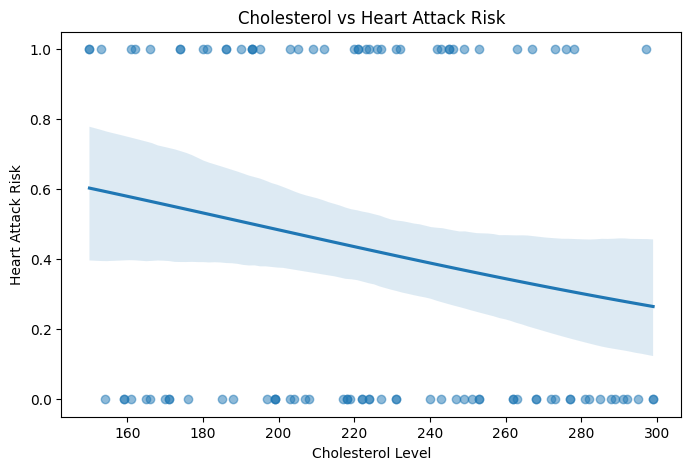

In [4]:
# 1. 콜레스테롤 vs 심장마비 위험 (산점도 + 회귀선)
plt.figure(figsize=(8, 5))
sns.regplot(x=df['cholesterol'], y=df['heart_attack_risk'], logistic=True, scatter_kws={'alpha': 0.5})
plt.xlabel('Cholesterol Level')
plt.ylabel('Heart Attack Risk')
plt.title('Cholesterol vs Heart Attack Risk')
plt.show()

**분석**
- 일반적으로 고콜레스테롤이 심혈관 질환과 연관이 있다고 알려져 있지만, 본 데이터에서는 반대 경향이 나타남.
- 특정 범위에서 낮은 콜레스테롤이 오히려 심장마비 위험을 증가시키는 요인일 가능성이 있음.
- 아니면.. 데이터 전처리 오류(이상치, 샘플 수 부족) 또는 추가적인 요인이 개입했을 가능성 고려 필요.

### Q2. 연령이 높아질수록 심장마비 발생 빈도가 높아질까?

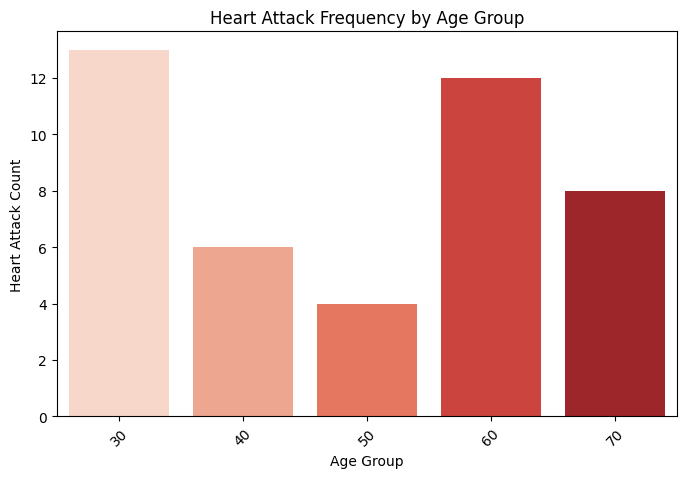

In [5]:
# 2. 연령대별 심장마비 발생 빈도 (막대 그래프)
df['age_group'] = (df['age'] // 10) * 10  # 연령을 10년 단위 그룹으로 변환
age_heart_attack = df[df['heart_attack_risk'] == 1].groupby('age_group')['heart_attack_risk'].count()
plt.figure(figsize=(8, 5))
sns.barplot(x=age_heart_attack.index, y=age_heart_attack.values, palette='Reds')
plt.xlabel('Age Group')
plt.ylabel('Heart Attack Count')
plt.title('Heart Attack Frequency by Age Group')
plt.xticks(rotation=45)
plt.show()

**분석**
- 높은 연령대(6,70대)에서 심장마비 발생 빈도가 높은 경향 보임
- 의외로 30대에서 심장마비 빈도 높음
- 현대 젊은이들의 식습관과 생활습관이 심장마비에 미치는 영향 고려 필요
- 나이가 들수록 혈관건강 악화 + 심혈관 질환 요인 누적 -> 심장마비 발생 확률 증가 예상

### Q3. 체중이 과체중 이상일수록 심장마비 위험이 커질까?

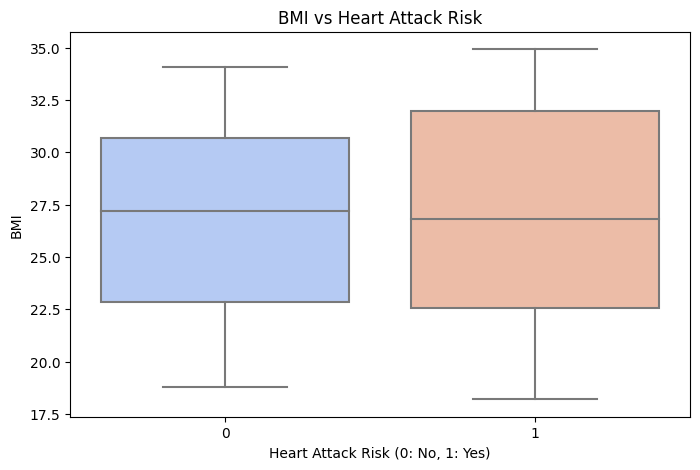

In [6]:
# 3. BMI vs 심장마비 위험 (박스플롯: 심장마비 유무에 따른 BMI 분포 확인)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['heart_attack_risk'], y=df['bmi'], palette='coolwarm')
plt.xlabel('Heart Attack Risk (0: No, 1: Yes)')
plt.ylabel('BMI')
plt.title('BMI vs Heart Attack Risk')
plt.show()

**분석**
- 심장마비 발생 그룹의 BMI 윗 범위가 상대적으로 높음
- 과체중 혹 비만일 경우 심장에 부담 증가, 혈압과 콜레스테롤 수치도 영향 받아 심장마비 위험 커질 수 O

### 혈압이 높을수록 심장마비 확률이 증가할까?

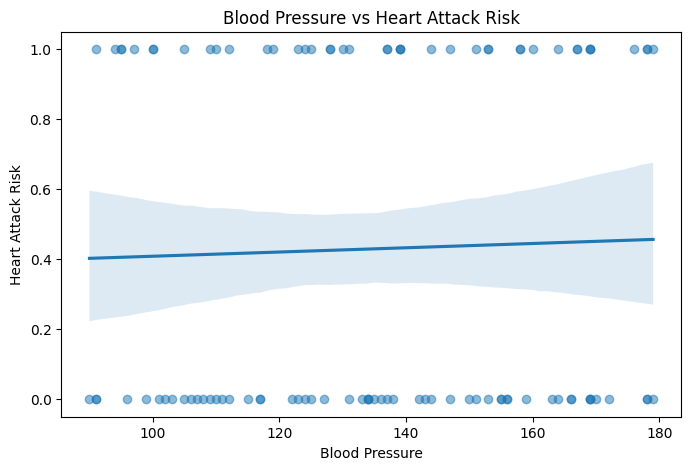

In [7]:
# 4. 혈압 vs 심장마비 위험 (산점도 + 회귀선: 혈압이 높을수록 위험 증가 여부 분석)
plt.figure(figsize=(8, 5))
sns.regplot(x=df['blood_pressure'], y=df['heart_attack_risk'], logistic=True, scatter_kws={'alpha': 0.5})
plt.xlabel('Blood Pressure')
plt.ylabel('Heart Attack Risk')
plt.title('Blood Pressure vs Heart Attack Risk')
plt.show()

**분석**
- 혈압이 높아질수록 심장마비 발생확률도 증가
- 고혈압도 심장마비 가능성을 증가시키는 위험요인으로 볼 수 있음
- 개별적인 혈압 수치보다는 고혈압 익간, 변동성 등의 요소가 더 중요한 요인일수도!
- 추가적으로 연령과 BMI를 같이 고려해보면 더 눈에 띄는 결과가 나올수도.

### 연령이 높을수록 콜레스테롤 수치가 증가할까?

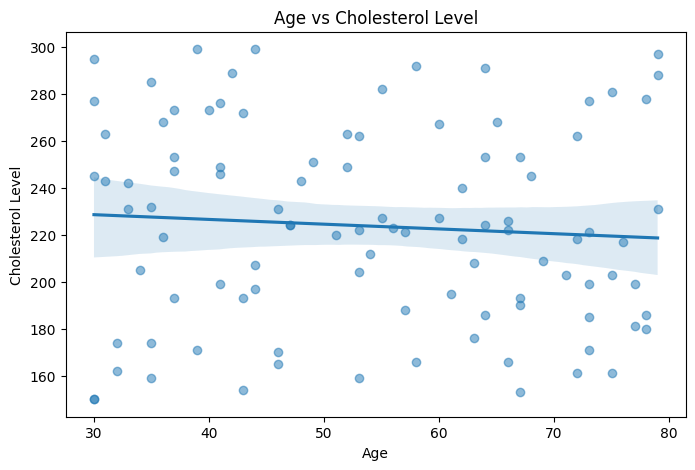

In [8]:
# 5. 연령 vs 콜레스테롤 (산점도 + 회귀선: 나이에 따라 콜레스테롤 수치 변화 확인)
plt.figure(figsize=(8, 5))
sns.regplot(x=df['age'], y=df['cholesterol'], scatter_kws={'alpha': 0.5})
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.title('Age vs Cholesterol Level')
plt.show()

**분석**
- 표 상에서 연령 증가와 콜레스테롤은 거의 연관 X
- 나이가 들수록 건강관리를 열심히 해서 그럴수도.
- 연령 증가에 따른 심혈관 질환 발생률과의 관계 추가분석 필요.

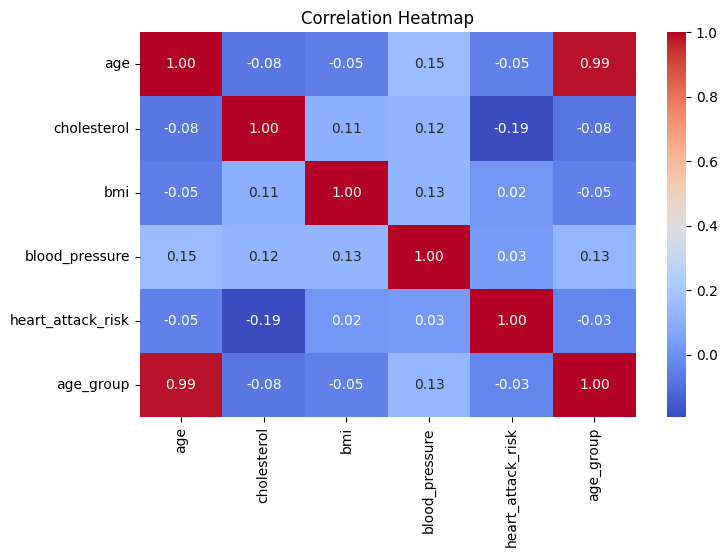

In [9]:
# 6. 변수 간 상관관계 히트맵 (숫자형 변수 간 관계 분석)
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## 📊 EDA 분석 컬럼 노트

| 변수명              | 내용                            | 데이터 타입   | 특징                                                      | 변수 아이디어                         |
|-------------------|-----------------------------|-------------|-------------------------------------------------------|-----------------------------------|
| age               | 환자의 나이                     | int         | 30~79세 사이의 값, 연령 증가와 심장마비 위험 간 연관 가능성            | 연령대를 기준으로 그룹화하여 분석 (age_group 활용)  |
| cholesterol       | 환자의 콜레스테롤 수치            | int         | 150~299 범위, 높은 콜레스테롤이 심장마비와 관련될 가능성       | 콜레스테롤을 범주형으로 변환하여 비교 (정상, 경계, 위험)  |
| bmi              | 환자의 체질량지수 (BMI)         | float       | 18~35 범위, 높은 BMI가 심장마비에 영향을 미칠 가능성           | BMI를 저체중, 정상, 과체중, 비만으로 분류하여 비교  |
| blood_pressure    | 환자의 혈압 수치                 | int         | 90~179 범위, 높은 혈압이 심장마비와 관계있을 가능성           | 고혈압 여부를 기준으로 이진 변수 생성 (정상/고혈압)  |
| heart_attack_risk | 심장마비 발생 여부 (0: 없음, 1: 있음) | int         | 0 또는 1의 범주형 데이터, 심장마비 발생 여부를 나타냄         | 심장마비 위험을 예측하는 타겟 변수로 활용  |
| age_group        | 연령을 10년 단위로 그룹화한 변수    | int         | 10년 단위로 연령을 그룹화하여 분석 가능                      | 연령대별 심장마비 위험도를 비교  |

